<a href="https://colab.research.google.com/github/ledinhthang20146426/AI_File/blob/main/AI_Final_Project_20146426.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from keras.layers import LeakyReLU
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical
from keras.models import load_model
from keras.utils import load_img, img_to_array
import os
from keras.preprocessing.image import ImageDataGenerator

In [2]:
train_data=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [3]:
training=train_data.flow_from_directory('/content/drive/MyDrive/FLOWER_IMAGE_20146426/train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 2003 images belonging to 10 classes.


In [4]:
training.class_indices

{'bougainvillea': 0,
 'daisy': 1,
 'gardenias': 2,
 'lilies': 3,
 'lotus': 4,
 'orchid': 5,
 'peach': 6,
 'rose': 7,
 'sunflower': 8,
 'water lily': 9}

In [5]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3), activation='relu', input_shape=(150,150,3), padding='same')) 
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,kernel_size=(3,3), activation='relu', padding='same'))
model.add(LeakyReLU(alpha=0.1)) 
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,kernel_size=(3,3), activation='relu', padding='same')) 
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(2,2))

In [6]:
#ANN
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(10,activation='softmax'))

In [7]:
#Compile
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 150, 150, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 75, 75, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [8]:
train=model.fit(training,epochs=50,batch_size=128,verbose=1)

Epoch 1/50
63/63 [==============================] - 623s 10s/step - loss: 1.7032 - accuracy: 0.4528
Epoch 2/50
63/63 [==============================] - 161s 3s/step - loss: 1.0937 - accuracy: 0.6241
Epoch 3/50
63/63 [==============================] - 151s 2s/step - loss: 0.8726 - accuracy: 0.7064
Epoch 4/50
63/63 [==============================] - 156s 2s/step - loss: 0.7122 - accuracy: 0.7664
Epoch 5/50
63/63 [==============================] - 153s 2s/step - loss: 0.5611 - accuracy: 0.8028
Epoch 6/50
63/63 [==============================] - 161s 3s/step - loss: 0.4938 - accuracy: 0.8342
Epoch 7/50
63/63 [==============================] - 151s 2s/step - loss: 0.4371 - accuracy: 0.8502
Epoch 8/50
63/63 [==============================] - 154s 2s/step - loss: 0.3746 - accuracy: 0.8827
Epoch 9/50
63/63 [==============================] - 152s 2s/step - loss: 0.3426 - accuracy: 0.8887
Epoch 10/50
63/63 [==============================] - 152s 2s/step - loss: 0.2431 - accuracy: 0.9191
Epoch 11

In [9]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.024435443803668022
Train Accuracy 0.9910134673118591


In [10]:
# Lưu 
model.save("/content/drive/MyDrive/FLOWER_IMAGE_20146426/modelflower.h5")

In [11]:
model_1=load_model('/content/drive/MyDrive/FLOWER_IMAGE_20146426/modelflower.h5')

1/1 [==============================] - 0s 184ms/step
rose


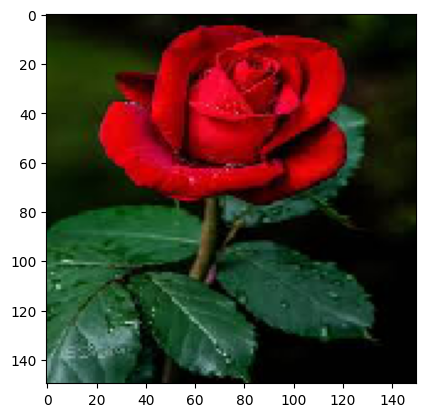

1/1 [==============================] - 0s 45ms/step
daisy


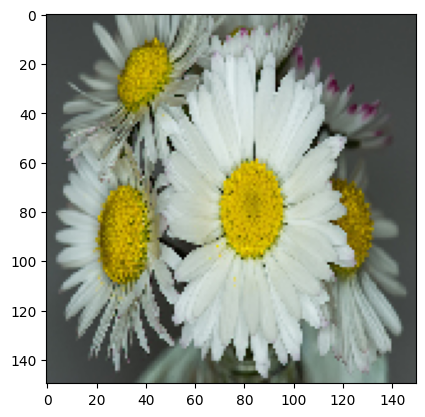

1/1 [==============================] - 0s 42ms/step
peachflower


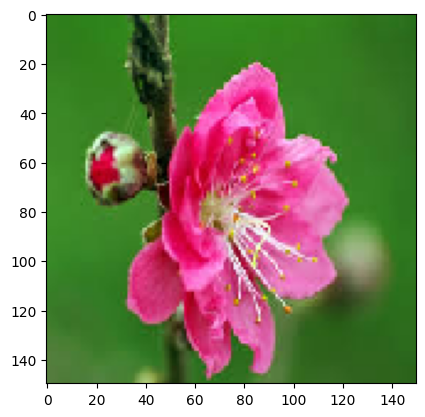

1/1 [==============================] - 0s 39ms/step
gardenias


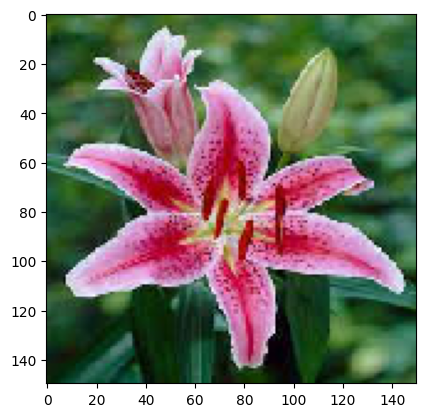

1/1 [==============================] - 0s 41ms/step
lilies


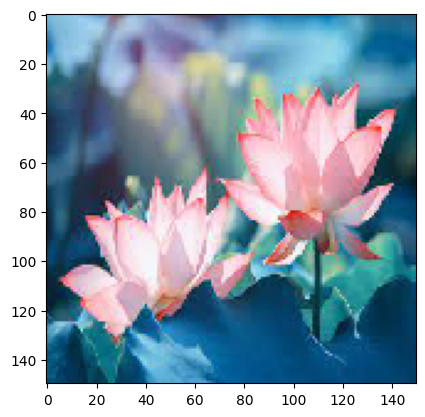

1/1 [==============================] - 0s 41ms/step
lotus


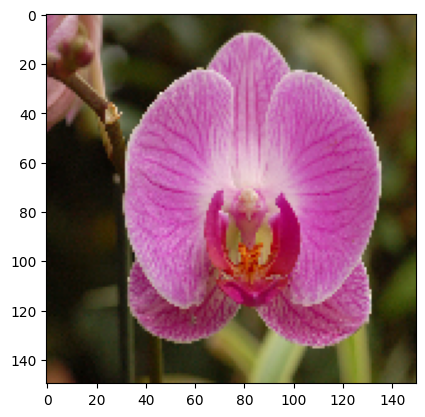

1/1 [==============================] - 0s 71ms/step
waterlily


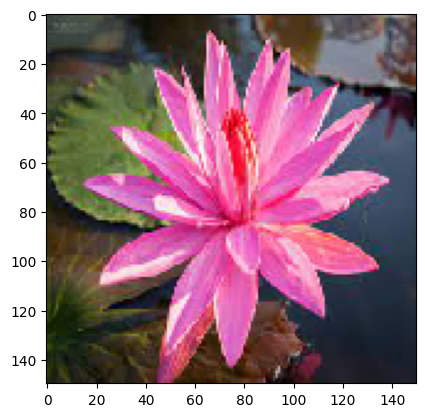

1/1 [==============================] - 0s 65ms/step
bougainvillea


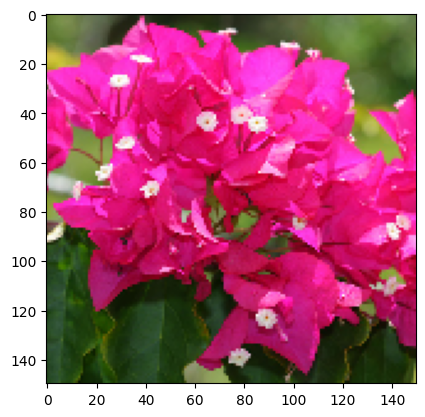

1/1 [==============================] - 0s 63ms/step
lotus


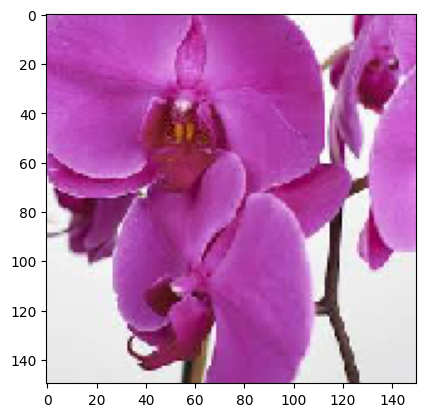

1/1 [==============================] - 0s 63ms/step
bougainvillea


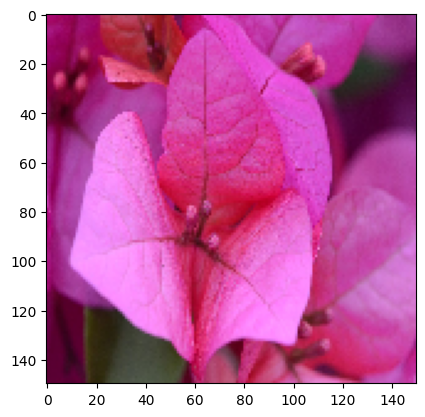

1/1 [==============================] - 0s 42ms/step
dandelion


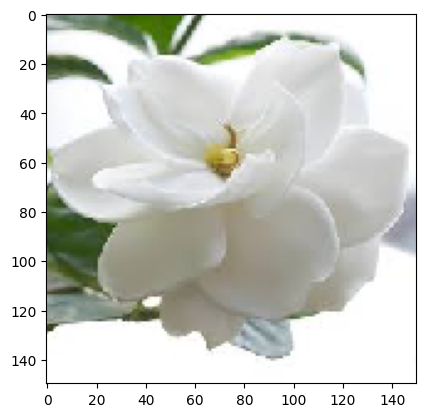

1/1 [==============================] - 0s 40ms/step
waterlily


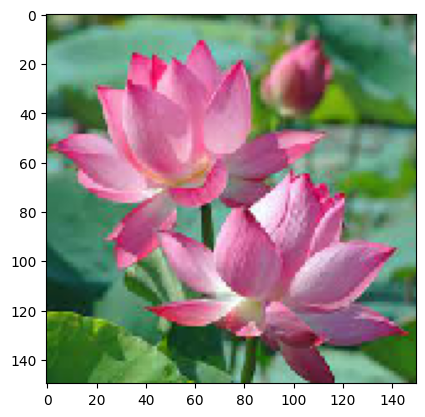

1/1 [==============================] - 0s 43ms/step
peachflower


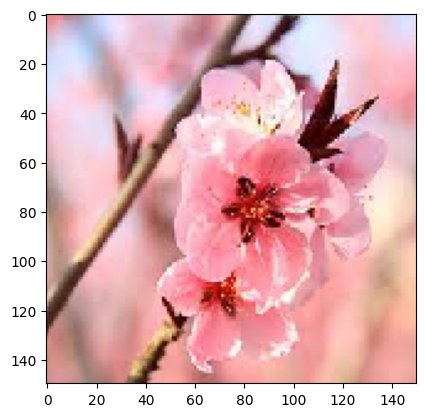

1/1 [==============================] - 0s 42ms/step
sunflower


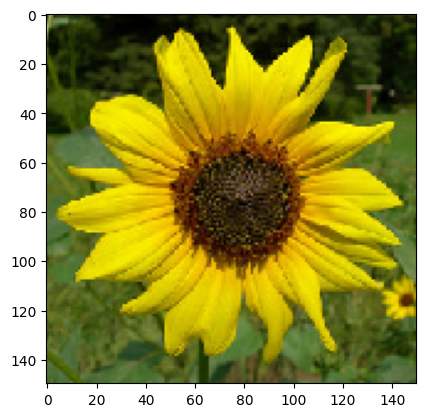

1/1 [==============================] - 0s 52ms/step
waterlily


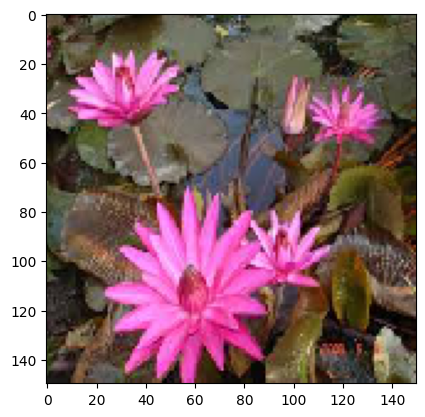

1/1 [==============================] - 0s 45ms/step
sunflower


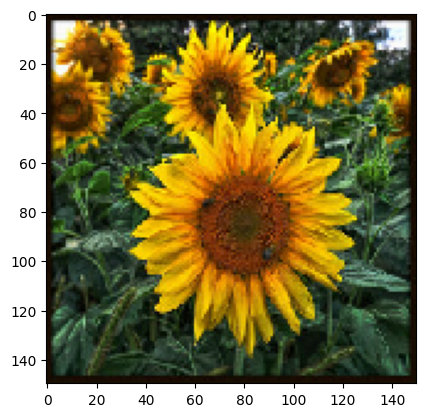

1/1 [==============================] - 0s 53ms/step
rose


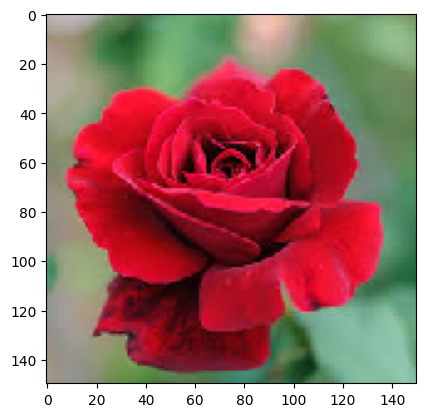

1/1 [==============================] - 0s 45ms/step
daisy


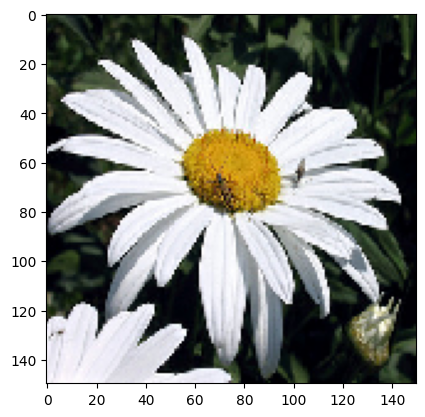

1/1 [==============================] - 0s 44ms/step
dandelion


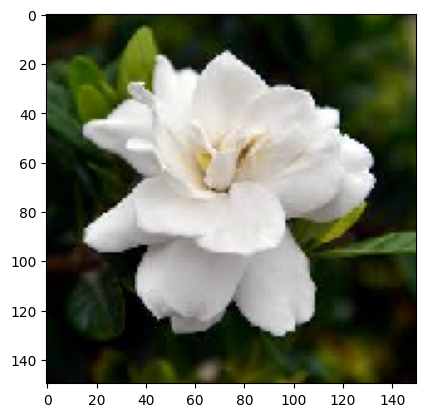

1/1 [==============================] - 0s 42ms/step
gardenias


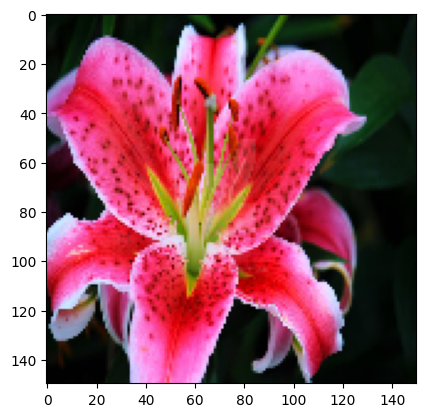

In [12]:
folder="/content/drive/MyDrive/FLOWER_IMAGE_20146426/test/"

for i in os.listdir(folder):
  img=load_img(folder+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model_1.predict(img).argmax())
  class_name=['bougainvillea','daisy','dandelion','gardenias','lilies','lotus','peachflower','rose','sunflower','waterlily']
  print(class_name[result])
  plt.show()

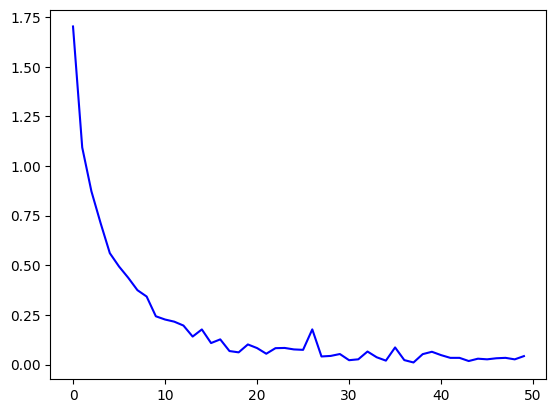

In [13]:
#Vẽ biểu đồ thể hiện sự mất mát qua số lần train
accuracy = train.history['accuracy']
loss = train.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs,loss,'b',label='Training loss')
plt.show()